In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence

Using TensorFlow backend.


In [2]:
import matplotlib.pyplot as plt
def plot(history):
    epoch = range(1, len(history['acc']) + 1)
    plt.clf()
    plt.plot(epoch, history['acc'], 'bo', label='Training Acc')
    plt.plot(epoch, history['loss'], 'b', label='Training Loss')
    plt.plot(epoch, history['val_acc'], 'ro', label='Validation Acc')
    plt.plot(epoch, history['val_loss'], 'r', label='Validation Loss')
    plt.legend()
    plt.show()

In [3]:
max_features = 10000
max_len = 1000

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)

In [4]:
x_train.shape

(25000, 1000)

In [5]:
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import RMSprop

In [6]:
model = Sequential()
model.add(Embedding(input_dim=max_features, output_dim=32, input_length=max_len))
model.add(Conv1D(32, 7, activation='relu'))
model.add(MaxPool1D(5))
model.add(Dropout(0.5))
model.add(Conv1D(32, 7, activation='relu'))
model.add(GlobalMaxPool1D())
model.add(Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1000, 32)          320000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 994, 32)           7200      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 198, 32)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 198, 32)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 192, 32)           7200      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total para

In [7]:
model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr = 1e-4), metrics=['acc'])
history = model.fit(
    x_train, y_train,
    epochs = 20,
    batch_size = 128,
    validation_split= 0.2 
)

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 4s 215us/step - loss: 0.6934 - acc: 0.5059 - val_loss: 0.6931 - val_acc: 0.5062
Epoch 2/20
20000/20000 [==============================] - 2s 77us/step - loss: 0.6929 - acc: 0.5095 - val_loss: 0.6927 - val_acc: 0.5062
Epoch 3/20
20000/20000 [==============================] - 2s 76us/step - loss: 0.6925 - acc: 0.5211 - val_loss: 0.6922 - val_acc: 0.5064
Epoch 4/20
20000/20000 [==============================] - 2s 76us/step - loss: 0.6918 - acc: 0.5382 - val_loss: 0.6913 - val_acc: 0.5068
Epoch 5/20
20000/20000 [==============================] - 2s 76us/step - loss: 0.6900 - acc: 0.5745 - val_loss: 0.6891 - val_acc: 0.5288
Epoch 6/20
20000/20000 [==============================] - 2s 76us/step - loss: 0.6864 - acc: 0.6116 - val_loss: 0.6839 - val_acc: 0.5274
Epoch 7/20
20000/20000 [==============================] - 2s 78us/step - loss: 0.6751 - acc: 0.6875 - val_loss: 0.6671 - val_acc

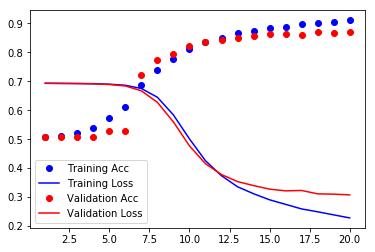

In [8]:
plot(history.history)

In [9]:
model.evaluate(x_train, y_train)

25000/25000 [==============================] - 1s 53us/step


[0.23049944856643675, 0.9118]

In [10]:
import os
glove_dir = 'datasets/'

embedding_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100D.txt'), encoding='utf8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embedding_index[word] = coefs
f.close()

embedding_dim = 100

In [11]:
embedding_matrix = np.zeros((max_features, embedding_dim))
word_index = imdb.get_word_index()
for word, i in word_index.items():
    if i < max_features:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [16]:
model = Sequential()
model.add(Embedding(input_dim=max_features, output_dim=100, input_length=max_len))
model.add(Conv1D(32, 7, activation='relu'))
model.add(MaxPool1D(5))
model.add(Dropout(0.5))
model.add(Conv1D(32, 7, activation='relu'))
model.add(GlobalMaxPool1D())
model.add(Dense(1, activation='sigmoid'))


model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False
model.summary()
model.save_weights('tmp.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 1000, 100)         1000000   
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 994, 32)           22432     
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 198, 32)           0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 198, 32)           0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 192, 32)           7200      
_________________________________________________________________
global_max_pooling1d_4 (Glob (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total para

In [20]:
model.load_weights("tmp.h5")
model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr = 1e-4), metrics=['acc'])
history01 = model.fit(
    x_train, y_train,
    epochs = 100,
    batch_size = 128,
    validation_split= 0.2 
)

Train on 20000 samples, validate on 5000 samples
Epoch 1/100
20000/20000 [==============================] - 2s 102us/step - loss: 0.7177 - acc: 0.5004 - val_loss: 0.7052 - val_acc: 0.4990
Epoch 2/100
20000/20000 [==============================] - 2s 78us/step - loss: 0.7028 - acc: 0.5115 - val_loss: 0.6901 - val_acc: 0.5316
Epoch 3/100
20000/20000 [==============================] - 2s 78us/step - loss: 0.6964 - acc: 0.5238 - val_loss: 0.6901 - val_acc: 0.5242
Epoch 4/100
20000/20000 [==============================] - 2s 78us/step - loss: 0.6925 - acc: 0.5306 - val_loss: 0.6896 - val_acc: 0.5292
Epoch 5/100
20000/20000 [==============================] - 2s 78us/step - loss: 0.6851 - acc: 0.5464 - val_loss: 0.6971 - val_acc: 0.5058
Epoch 6/100
20000/20000 [==============================] - 2s 79us/step - loss: 0.6827 - acc: 0.5598 - val_loss: 0.6826 - val_acc: 0.5530
Epoch 7/100
20000/20000 [==============================] - 2s 78us/step - loss: 0.6801 - acc: 0.5661 - val_loss: 0.6787 - 

20000/20000 [==============================] - 2s 76us/step - loss: 0.5272 - acc: 0.7396 - val_loss: 0.5615 - val_acc: 0.7122
Epoch 60/100
20000/20000 [==============================] - 2s 76us/step - loss: 0.5261 - acc: 0.7421 - val_loss: 0.5475 - val_acc: 0.7342
Epoch 61/100
20000/20000 [==============================] - 2s 76us/step - loss: 0.5248 - acc: 0.7419 - val_loss: 0.5509 - val_acc: 0.7274
Epoch 62/100
20000/20000 [==============================] - 2s 77us/step - loss: 0.5223 - acc: 0.7436 - val_loss: 0.5534 - val_acc: 0.7256
Epoch 63/100
20000/20000 [==============================] - 2s 76us/step - loss: 0.5183 - acc: 0.7442 - val_loss: 0.5451 - val_acc: 0.7346
Epoch 64/100
20000/20000 [==============================] - 2s 78us/step - loss: 0.5160 - acc: 0.7436 - val_loss: 0.5595 - val_acc: 0.7098
Epoch 65/100
20000/20000 [==============================] - 2s 76us/step - loss: 0.5154 - acc: 0.7513 - val_loss: 0.5419 - val_acc: 0.7374
Epoch 66/100
20000/20000 [==============

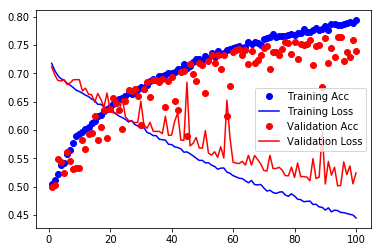

In [26]:
plot(history.history)

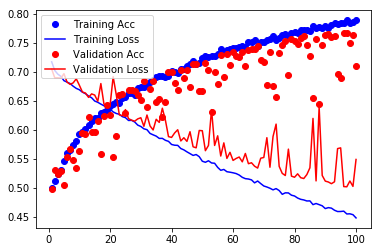

In [25]:
plot(history01.history)

In [27]:
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 2s 68us/step


[0.5629466998672485, 0.70588]